In [1]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.ticker as mtick

## MFCS MARINE

In [2]:
# Read csv
# Total data table
mfcs_df = pd.read_csv("../data/mfcs_marine/data_1701-1811.csv", encoding="utf-8", names=['name', 'code'])
mfcs_df.head()

FileNotFoundError: [Errno 2] File b'../data/mfcs_marine/data_1701-1811.csv' does not exist: b'../data/mfcs_marine/data_1701-1811.csv'

In [4]:
# Non-preprocessed name unique table
name_count_mfcs_df = mfcs_df.groupby('name').agg('count')
name_count_mfcs_df.columns = ['count']
name_count_mfcs_df.head()

,count
name,
ZINC WASTE AND SCRAP,1
""" BRAVO "" BRAND (A) 1,900 (ONE THOUSAND AND NINE HUNDRED) CARTONS OF SARDINES 50/155 G. IN TOMATO SAUCE/EOE (B) 1,900 (ONE THOUSAND AND NINE HUNDRED)CARTONS OF SARDINES 50/155",1
""" BRAVO "" BRAND (A) 1800 (ONE THOUSAND AND EIGHT HUNDRED) CARTONS OF SARDINES 50/155 G. IN TOMATO SAUCE/EOE (B) 1800 (ONE THOUSAND AND EIGHT HUNDRED)CARTONS OF SARDINES 50/155 G. IN TOMATO SAUCE",1
""" BRAVO "" BRAND (A) 900 (NINE HUNDRED) CARTONS OFSARDINES 50/155 G. IN TOMATO SAUCE/EOE (B) 900 (NINE HUNDRED) CARTONS OF SARDINES 50/155 G. IN TOMATO SAUCE WITH CHILI/EOE",1
""" DESCRIPCION OF GOOD"" DRIED SPHAGNUMMOSS SP 5 STARS QUALITY",1


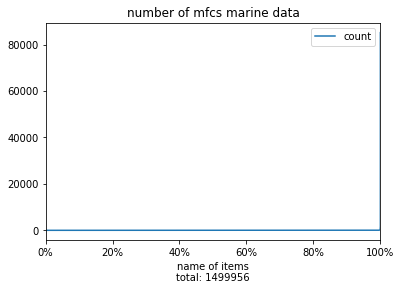

In [9]:
# Xaxis: Transfer name to cumulative ratio
perc = np.linspace(0,100,len(name_count_mfcs_df))
name_count_mfcs_df = name_count_mfcs_df.sort_values(by='count')
name_count_mfcs_df['perc'] = perc
ax = name_count_mfcs_df.set_index('perc').plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of mfcs marine data')
plt.xlabel('name of items\ntotal: ' + str(len(name_count_mfcs_df)))
plt.show()

In [10]:
prep_mfcs_df = mfcs_df
prep_mfcs_df.name = prep_mfcs_df.name.str.upper().replace(r'[^A-Z\- ]+', ' ', regex=True)\
                    .replace(r'\B[\-]\B|\B[\-]|[\-]\B', ' ', regex=True)\
                    .replace(r'((?<=^)|(?<=\s))\w(?=(\s|$))', ' ', regex=True)\
                    .replace(r'\s{2,}', ' ', regex=True)\
                    .str.strip()
prep_mfcs_df.head()

,name,code
0,ZINC WASTE AND SCRAP,750300
1,BRAVO BRAND ONE THOUSAND AND NINE HUNDRED CART...,160411
2,BRAVO BRAND ONE THOUSAND AND EIGHT HUNDRED CAR...,210390
3,BRAVO BRAND NINE HUNDRED CARTONS OFSARDINES IN...,848340
4,DESCRIPCION OF GOOD DRIED SPHAGNUMMOSS SP STAR...,630210


In [11]:
# preprocessed name unique table
name_count_prep_mfcs_df = prep_mfcs_df.groupby('name').agg('count')
name_count_prep_mfcs_df.columns = ['count']
name_count_prep_mfcs_df.head()

,count
name,
,4556
A-ACS-CONTROLLED MOTOR CN OH CM,1
A-BULK KG-F A-CHRYSAN ADDITIVE,1
A-C ARTIFICIAL WAX NON HAZARDOUS NLR A-C ARTIFICIAL WAX NON HAZARDOUS NLR ACUMIST ARTIFICIAL WAX NON HAZARDOUS NLR HSC NUMBER NS,1
A-C KG BAG ARTIFICIAL WAX NLR DAYS FREETIME DESTINATION DETENTION EQUIPMENT ONLY A-C KG BAG ARTIFICIAL WAX NON-HAZARDOUS NLR,1


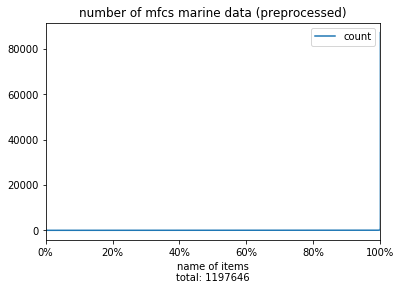

In [12]:
# Xaxis: Transfer name to cumulative ratio
perc = np.linspace(0,100,len(name_count_prep_mfcs_df))
name_count_prep_mfcs_df = name_count_prep_mfcs_df.sort_values(by='count')
name_count_prep_mfcs_df['perc'] = perc
ax = name_count_prep_mfcs_df.set_index('perc').plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of mfcs marine data (preprocessed)')
plt.xlabel('name of items\ntotal: ' + str(len(name_count_prep_mfcs_df)))
plt.show()

In [13]:
name_count_prep_mfcs_df.tail()

,count,perc
name,,
STONE PRODUCTS,10961,99.999666
GARMENT,16349,99.999750
EMPTY CONTAINERS,24321,99.999833
EMPTY CONTAINER,29276,99.999917
AS PER ATTACHED RIDER LIST,87170,100.000000


In [15]:
mfcs_df.sort_values(by='code').tail()

,name,code
2505883,NICOSULFURON SL SC,XXXXXX
2626426,PA GENESTARPA GENESTAR,XXXXXX
2444838,MULTMATS,XXXXXX
3995359,YAMAHA CADDIE BAG YAMAHA BOSTON BAG WUK,YAMAHA
3307100,SLIPPER-WHITE,d=cont


In [21]:
# error in code
mfcs_df.loc[mfcs_df['code'].str.contains(r'[^\d]{6}', regex=True)].sort_values(by='code')

,name,code
414279,ANGLE GRINDER CIRCULAR HAND SAW CORDLESS CIRCU...,CIRCUL
2677365,PARTS FOR AGRICULTURAL MACHINE,CONSOL
1038439,COPPER CONCENTRATE,COPPER
1038454,COPPER CONCENTRATE,COPPER
1038437,COPPER CONCENTRATE,COPPER
...,...,...
1372537,ESCALATORS ESTKEK,XXXXXX
1372538,ESCALATORS ESTKEK,XXXXXX
4013088,ZERO SPANGLE,XXXXXX
3995359,YAMAHA CADDIE BAG YAMAHA BOSTON BAG WUK,YAMAHA


In [22]:
# preprocessed code unique table
code_count_mfcs_df = mfcs_df.loc[mfcs_df['code'].str.contains(r'[\d]{6}', regex=True)].groupby('code').agg('count')
code_count_mfcs_df.columns = ['count']
code_count_mfcs_df.head()

,count
code,
000000,412
000010,2
000100,1005
000200,1
001000,5


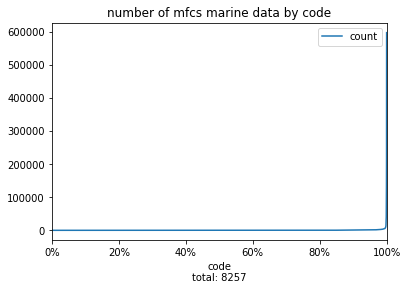

In [27]:
# Xaxis: Transfer code to cumulative ratio
perc = np.linspace(0,100,len(code_count_mfcs_df))
code_count_mfcs_df = code_count_mfcs_df.sort_values(by='count')
code_count_mfcs_df['perc'] = perc
ax = code_count_mfcs_df.set_index('perc').plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of mfcs marine data by code')
plt.xlabel('code\ntotal: ' + str(len(code_count_mfcs_df)))
plt.show()

In [26]:
code_count_mfcs_df.tail(10)

,count,perc
code,,
621700,40962,99.890988
860900,57622,99.903101
960100,79804,99.915213
848700,82824,99.927326
950420,106113,99.939438
630710,134195,99.951550
510720,187893,99.963663
630210,214889,99.975775
854300,489144,99.987888


In [4]:
print('total count:', len(trade_df))

total count: 4020031


In [5]:
print('total count(duplicated name dropped):', len(dropped_df))

total count(duplicated name dropped): 1499956


In [6]:
dropped_df = dropped_df.sort_values()

In [7]:
plt.rcParams["figure.figsize"] = (40,15)

In [9]:
dropped_df.max()

85153

## goglobal

In [89]:
gogl_df = pd.read_excel("../data/goglobal/GOGLOBAL_ITEM.xlsx", encoding="utf-8")
gogl_df.head()

,표준품명,거래품명,HSCODE
0,ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF,WHEEL CAP,8708700000
1,OTHER,HBS-900,8518309000
2,OTHER,BANILA CO-IT RADIANT CC C,330499
3,OF TEXTILE MATERIALS,CUTE BUGSY BAG,4202122000
4,OTHER,HEDAPHONE,8518109000


In [35]:
name_count_gogl_df = gogl_df.groupby('거래품명').agg('count')
name_count_gogl_df = name_count_gogl_df.drop('표준품명', axis=1)
name_count_gogl_df.columns = ['count']
name_count_gogl_df.head()

,count
거래품명,
PHOTOBOOK F Y,1
"""1 SEC ALL-KILL REMOVER STICK""",1
"""4D STICK 3.DIET BRONZER""",1
"""4D STICK 4.DIAMOND HIGHLIGHT""",1
"""ALL KILL PORE BRUSH""",1


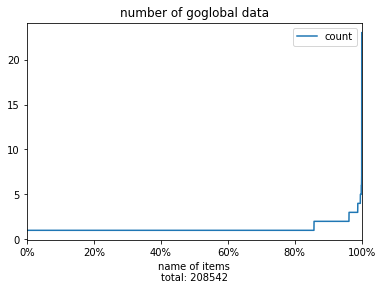

In [37]:
# Xaxis: Transfer name to cumulative ratio
perc = np.linspace(0,100,len(name_count_gogl_df))
name_count_gogl_df = name_count_gogl_df.sort_values(by='count')
name_count_gogl_df['perc'] = perc
ax = name_count_gogl_df.set_index('perc').plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of goglobal data')
plt.xlabel('name of items\ntotal: ' + str(len(name_count_gogl_df)))
plt.show()

In [39]:
prep_gogl_df = gogl_df
prep_gogl_df['거래품명'] = prep_gogl_df['거래품명'].str.upper().replace(r'[^A-Z\- ]+', ' ', regex=True)\
                    .replace(r'\B[\-]\B|\B[\-]|[\-]\B', ' ', regex=True)\
                    .replace(r'((?<=^)|(?<=\s))\w(?=(\s|$))', ' ', regex=True)\
                    .replace(r'\s{2,}', ' ', regex=True)\
                    .str.strip()
prep_gogl_df.head()

,표준품명,거래품명,HSCODE
0,ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF,WHEEL CAP,8708700000
1,OTHER,HBS,8518309000
2,OTHER,BANILA CO-IT RADIANT CC,330499
3,OF TEXTILE MATERIALS,CUTE BUGSY BAG,4202122000
4,OTHER,HEDAPHONE,8518109000


In [43]:
# preprocessed name unique table
name_count_prep_gogl_df = prep_gogl_df.groupby('거래품명').agg('count')
name_count_prep_gogl_df = name_count_prep_gogl_df.drop('표준품명', axis=1)
name_count_prep_gogl_df.columns = ['count']
name_count_prep_gogl_df.head()

,count
거래품명,
,5750
A-LINE DRESS,1
AA,1
AA WOOL SOCKS,1
AA-AE,3


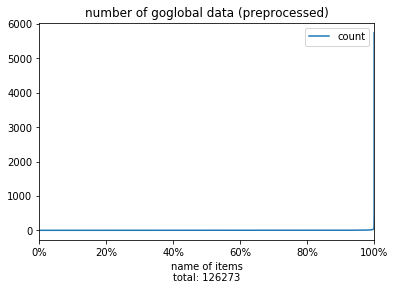

In [44]:
# Xaxis: Transfer name to cumulative ratio
perc = np.linspace(0,100,len(name_count_prep_gogl_df))
name_count_prep_gogl_df = name_count_prep_gogl_df.sort_values(by='count')
name_count_prep_gogl_df['perc'] = perc
ax = name_count_prep_gogl_df.set_index('perc').plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of goglobal data (preprocessed)')
plt.xlabel('name of items\ntotal: ' + str(len(name_count_prep_gogl_df)))
plt.show()

In [45]:
name_count_prep_gogl_df.tail()

,count,perc
거래품명,,
TJ ZHANG,440,99.996832
TAKARA TOMY BEYBLADE BURST,442,99.997624
TJ WANG,473,99.998416
CHENWANTONG,715,99.999208
,5750,100.000000


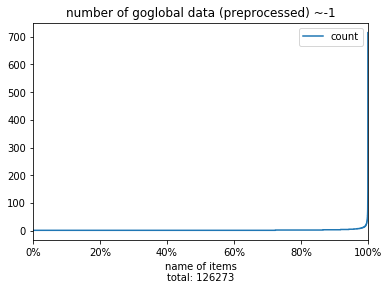

In [54]:
# Xaxis: Transfer name to cumulative ratio
perc = np.linspace(0,100,len(name_count_prep_gogl_df))
name_count_prep_gogl_df = name_count_prep_gogl_df.sort_values(by='count')
name_count_prep_gogl_df['perc'] = perc
ax = name_count_prep_gogl_df.set_index('perc').iloc[:-1].plot()
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('number of goglobal data (preprocessed) ~-1')
plt.xlabel('name of items\ntotal: ' + str(len(name_count_prep_gogl_df)))
plt.show()

In [55]:
gogl_df.sort_values(by='HSCODE').tail()

,표준품명,거래품명,HSCODE
174129,OTHER,PHOTOGRAPH SET,9701900000
1792,OTHER,PHOTOGRAPH,9701900000
142732,OTHER,IRENE PHOTO STICKER,9701900000
80488,OTHER,BLACKPINK CD,9704009000
17730,OTHER,BTS DVD DISC,9704009000


In [56]:
gogl_df.sort_values(by='HSCODE').head()

,표준품명,거래품명,HSCODE
110463,"PRINTED BOOKS, BROCHURES, LEAFLETS AND SIMILAR...",BOOK,4901
157595,ABALONE,ABALONE,160557
110464,OTHER PASTA,NOODLE,190230
46936,"OTHER, INCLUDING MIXTURES",GILIM-HONEY BUTTER ALMOND,200819
187867,OTHER,CJ-BIBIGO SEAWEED CRISPS,200899


In [90]:
gogl_df = gogl_df.astype({'HSCODE': str})
gogl_df.dtypes

표준품명      object
거래품명      object
HSCODE    object
dtype: object

In [91]:
gogl_df['HSCODE'] = gogl_df['HSCODE'].str.slice(stop=6)
gogl_df.head()

,표준품명,거래품명,HSCODE
0,ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF,WHEEL CAP,870870
1,OTHER,HBS-900,851830
2,OTHER,BANILA CO-IT RADIANT CC C,330499
3,OF TEXTILE MATERIALS,CUTE BUGSY BAG,420212
4,OTHER,HEDAPHONE,851810


In [92]:
gogl_df.loc[gogl_df['HSCODE'].str.len() < 6]

,표준품명,거래품명,HSCODE
110463,"PRINTED BOOKS, BROCHURES, LEAFLETS AND SIMILAR...",BOOK,4901


In [93]:
gogl_df.head()

,표준품명,거래품명,HSCODE
0,ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF,WHEEL CAP,870870
1,OTHER,HBS-900,851830
2,OTHER,BANILA CO-IT RADIANT CC C,330499
3,OF TEXTILE MATERIALS,CUTE BUGSY BAG,420212
4,OTHER,HEDAPHONE,851810


In [16]:
print('total count:', len(gogl_df))
print('total count(duplicated name dropped):', len(dropped_df))

total count: 250351
total count(duplicated name dropped): 208542


In [17]:
dropped_df = dropped_df.sort_values()

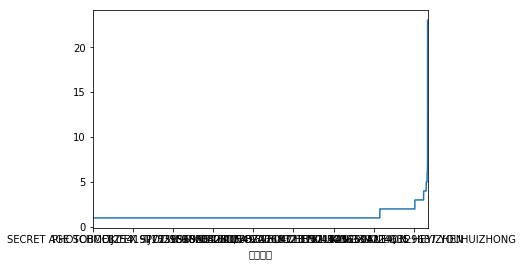

In [18]:
dropped_df.plot()

In [19]:
dropped_df.max()

23

In [26]:
gogl_df['거래품명'] = gogl_df['거래품명'].str.replace(r'[^a-zA-Z\- ]+', ' ', regex=True)\
                    .replace(r'\B[\-]\B|\B[\-]|[\-]\B', '', regex=True)\
                    .replace(r'\s[a-zA-Z]\s|\s[a-zA-Z]$|^[a-zA-Z]\s', '', regex=True)\
                    .replace(r'\s{2,}', ' ', regex=True)\
                    .str.upper().str.strip()
gogl_df.head

<bound method NDFrame.head of                                                  표준품명  \
0       ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF   
1                                               OTHER   
2                                               OTHER   
3                                OF TEXTILE MATERIALS   
4                                               OTHER   
...                                               ...   
250346                                         HOODIE   
250347                                      OUTERCOAT   
250348                                          SKIRT   
250349                                        TSHIRTS   
250350                                       ONEPIECE   

                           거래품명      HSCODE  
0                     WHEEL CAP  8708700000  
1                           HBS  8518309000  
2       BANILA CO-IT RADIANT CC      330499  
3                CUTE BUGSY BAG  4202122000  
4                     HEDAPHONE  8518109000  
...      

In [27]:
gogl_df

,표준품명,거래품명,HSCODE
0,ROAD WHEELS AND PARTS AND ACCESSORIES THEREOF,WHEEL CAP,8708700000
1,OTHER,HBS,8518309000
2,OTHER,BANILA CO-IT RADIANT CC,330499
3,OF TEXTILE MATERIALS,CUTE BUGSY BAG,4202122000
4,OTHER,HEDAPHONE,8518109000
...,...,...,...
250346,HOODIE,LINJING,6109101000
250347,OUTERCOAT,CHENCAN,6201931000
250348,SKIRT,ZHONGWENTING,4203109070
250349,TSHIRTS,LINJING,6109109000


In [28]:
dropped_df = gogl_df.groupby('거래품명').agg('size')
dropped_df.head()

거래품명
                                    5694
A                                     24
A ABRAMS PLASTIC MODEL KIT             1
A COLOR COMBINATION STRIPE SOCKS       1
A FISH TAPE                            1
dtype: int64

In [29]:
print('total count:', len(gogl_df))
print('total count(duplicated name dropped):', len(dropped_df))

total count: 250351
total count(duplicated name dropped): 141503


In [30]:
dropped_df = dropped_df.sort_values()

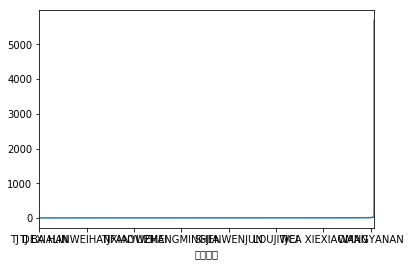

In [31]:
dropped_df.plot()

In [34]:
dropped_df.loc[dropped_df == dropped_df.max()]

거래품명
    5694
dtype: int64

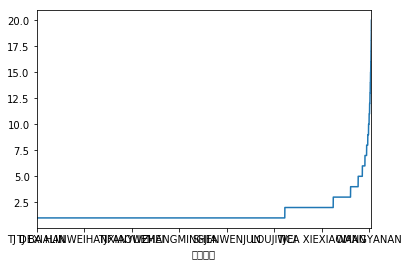

In [63]:
dropped_df.iloc[:-500].plot()

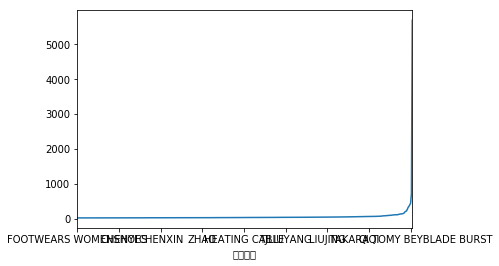

In [60]:
dropped_df.iloc[141100:].plot()

In [68]:
dropped_df.sort_values(ascending=False).head(10)

거래품명
                              5694
CHENWANTONG                    715
TAKARA TOMY BEYBLADE BURST     442
BANYINFU                       400
DINGXUEQIANG                   355
SHOE                           322
ZHONGWENTING                   265
TJWANG                         220
TJZHANG                        213
TJXIAOZHOU                     189
dtype: int64

## Preprecess test

In [50]:
df = pd.DataFrame({"name":["A B WEFWEHK TEST","BB TEST TESTEST", "TESTTE -TEST", "T-SHIRT", "TEST-TE", "-T- -tiger-", "H  E      ", "   TE"]})
df

,name
0,A B WEFWEHK TEST
1,BB TEST TESTEST
2,TESTTE -TEST
3,T-SHIRT
4,TEST-TE
5,-T- -tiger-
6,H E
7,TE


In [63]:
df.name.str.upper().replace(r'[^A-Z\- ]+', ' ', regex=True)\
                    .replace(r'\B[\-]\B|\B[\-]|[\-]\B', ' ', regex=True)\
                    .replace(r'((?<=^)|(?<=\s))\w(?=(\s|$))', ' ', regex=True)\
                    .replace(r'\s{2,}', ' ', regex=True)\
                    .str.strip()\
                    .str.split(' ').filter(a.length ==1)

NameError: name 'a' is not defined